In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [152]:
dataset = pd.read_csv('DataSet\\Crop_Production.csv')
dataset.head()

,Unnamed: 0,State_Name,District_Name,Crop_Year,Season_Type,Crop_Name,Area,Production
0,101,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,102,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,103,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,104,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,105,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [153]:
dataset.columns

Index(['Unnamed: 0', 'State_Name', 'District_Name', 'Crop_Year', 'Season_Type',
       'Crop_Name', 'Area', 'Production'],
      dtype='object')

In [154]:
dataset.drop('Unnamed: 0', axis=1,inplace=True)
dataset.head()

,State_Name,District_Name,Crop_Year,Season_Type,Crop_Name,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [155]:
dataset.shape

(246091, 7)

In [156]:
dataset.isnull().sum()

State_Name          0
District_Name       0
Crop_Year           0
Season_Type         0
Crop_Name           0
Area                0
Production       3730
dtype: int64

In [157]:
# dataset.dropna(subset=['Production'], inplace=True)


In [158]:
mean_production = dataset['Production'].mean()
dataset['Production'].fillna(mean_production, inplace=True)


In [159]:
dataset.isnull().sum()


State_Name       0
District_Name    0
Crop_Year        0
Season_Type      0
Crop_Name        0
Area             0
Production       0
dtype: int64

In [160]:
dataset.columns

Index(['State_Name', 'District_Name', 'Crop_Year', 'Season_Type', 'Crop_Name',
       'Area', 'Production'],
      dtype='object')

In [161]:
dataset.duplicated().sum()

0

In [162]:
dataset.describe()

,Crop_Year,Area,Production
count,246091.000000,2.460910e+05,2.460910e+05
mean,2005.643018,1.200282e+04,5.825034e+05
std,4.952164,5.052340e+04,1.693599e+07
min,1997.000000,4.000000e-02,0.000000e+00
25%,2002.000000,8.000000e+01,9.100000e+01
50%,2006.000000,5.820000e+02,7.880000e+02
75%,2010.000000,4.392000e+03,8.000000e+03
max,2015.000000,8.580100e+06,1.250800e+09


<Axes: xlabel='count', ylabel='State_Name'>

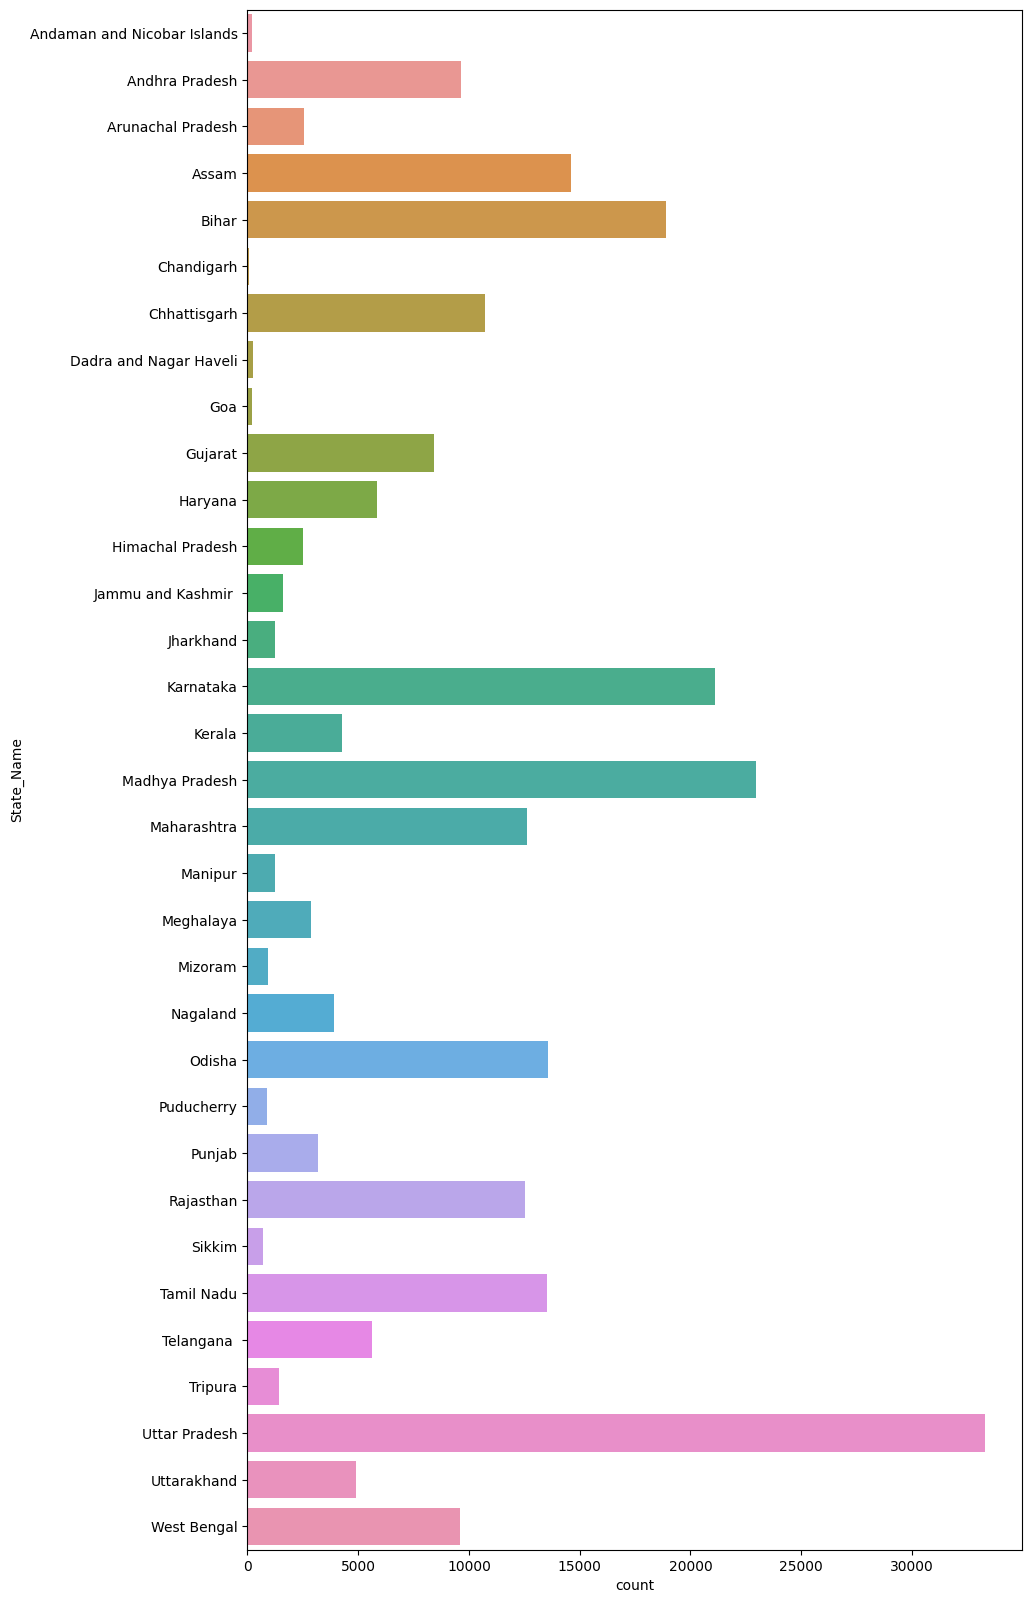

In [163]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,20))
sns.countplot(y = dataset['State_Name'])

In [164]:
len(dataset['State_Name'].unique())

33

In [165]:
state = (dataset['State_Name'].unique())

In [166]:
yield_per_state = []
for sta in state:
   yield_per_state.append(dataset[dataset['State_Name'] == sta]['Area'].sum()) 

In [167]:
dataset['Area']

0           1254.0
1              2.0
2            102.0
3            176.0
4            720.0
            ...   
246086       306.0
246087       627.0
246088       324.0
246089    279151.0
246090       175.0
Name: Area, Length: 246091, dtype: float64

<Axes: >

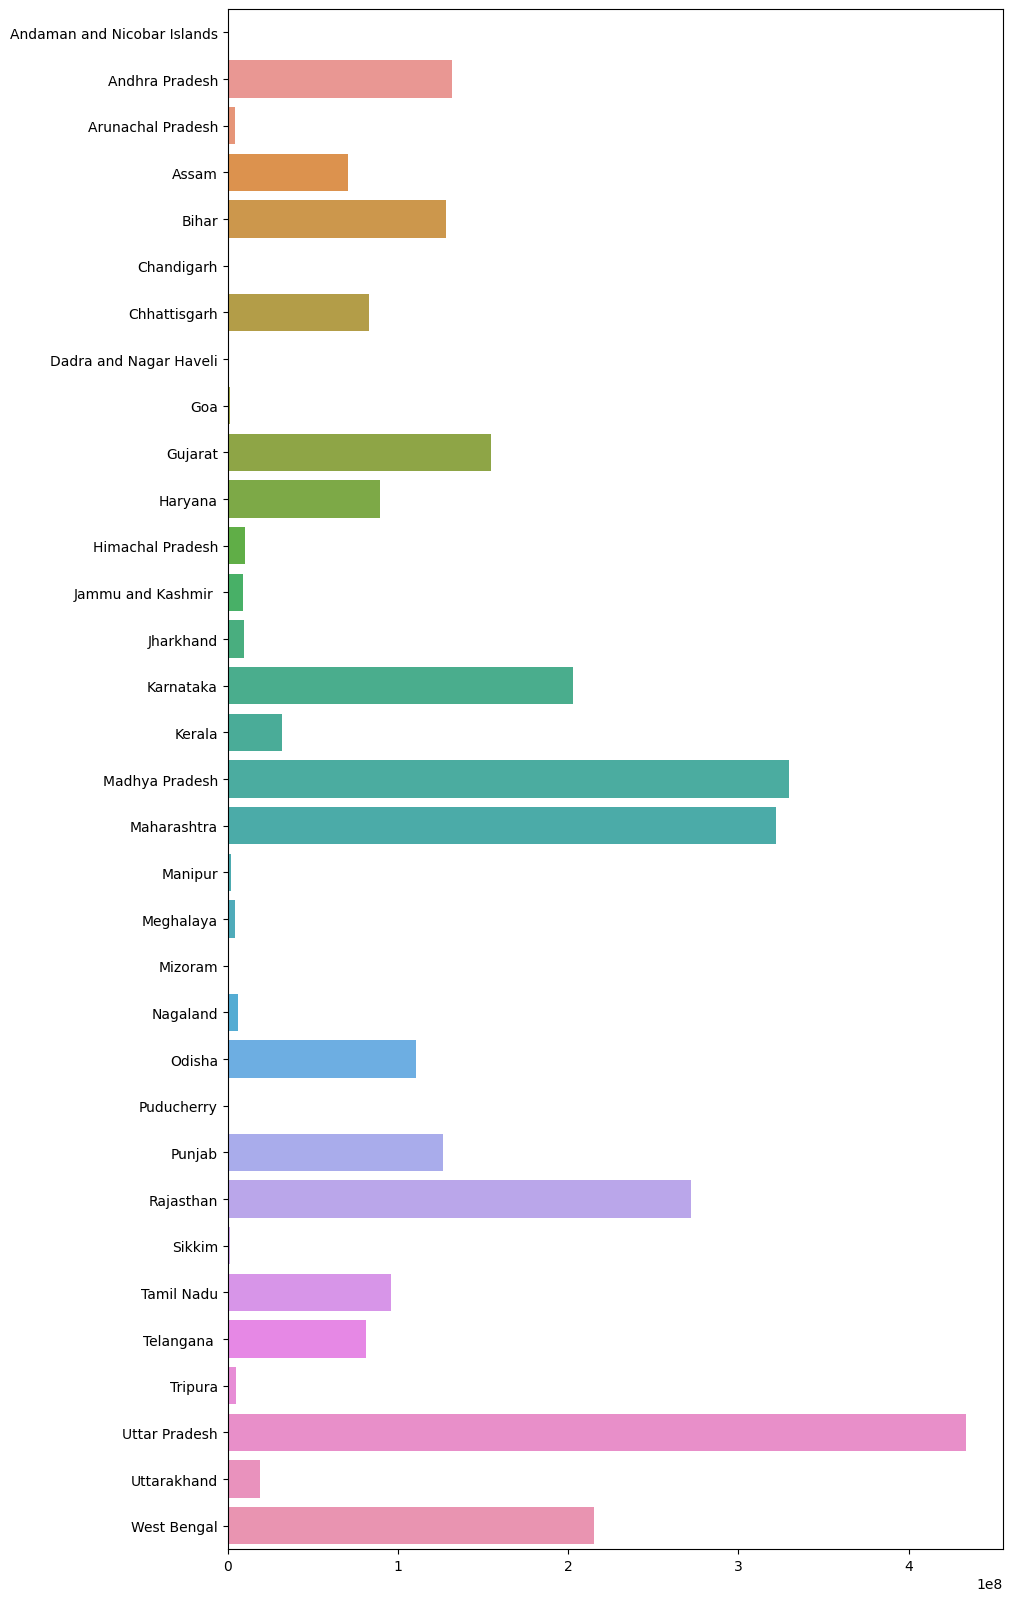

In [168]:
plt.figure(figsize=(10,20))
sns.barplot(y = state, x = yield_per_state)

<Axes: xlabel='count', ylabel='Season_Type'>

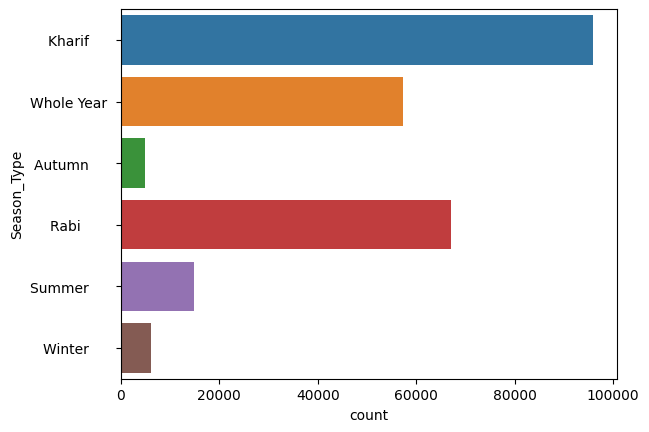

In [169]:
sns.countplot(y = dataset['Season_Type'])

<Axes: xlabel='count', ylabel='Crop_Name'>

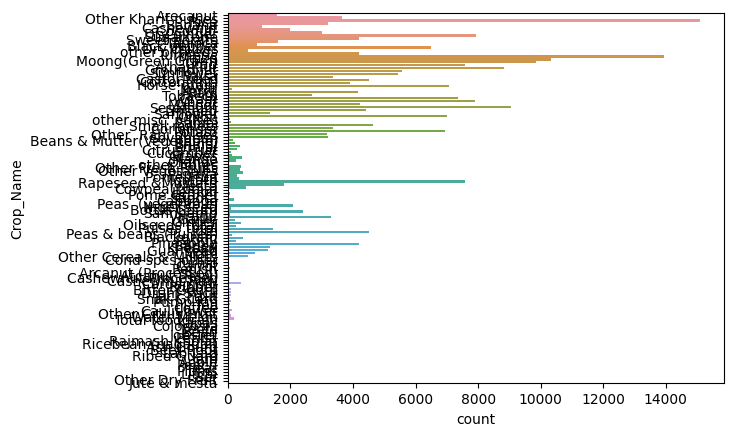

In [170]:
sns.countplot(y = dataset['Crop_Name'])

In [171]:
crops = (dataset['Crop_Name'].unique())

In [172]:
yield_per_item = []
for corp in crops:
    yield_per_item.append(dataset[dataset['Crop_Name'] == corp]['Production'].sum())

Train Test split Rearrnging Columns

In [173]:
col = ['Crop_Year','State_Name', 'District_Name', 'Season_Type', 'Crop_Name','Area', 'Production']
dataset = dataset[col]

In [174]:
dataset.head(2)

,Crop_Year,State_Name,District_Name,Season_Type,Crop_Name,Area,Production
0,2000,Andaman and Nicobar Islands,NICOBARS,Kharif,Arecanut,1254.0,2000.0
1,2000,Andaman and Nicobar Islands,NICOBARS,Kharif,Other Kharif pulses,2.0,1.0


In [175]:
x = dataset.drop('Production', axis=1)
y = dataset['Production']


In [176]:
from sklearn.model_selection import train_test_split

In [177]:
x_train, x_test, y_train, y_text = train_test_split(x,y, test_size=0.2, random_state = 42)

In [178]:
x_train.shape

(196872, 6)

In [179]:
x_test.shape

(49219, 6)

In [180]:
x_train

,Crop_Year,State_Name,District_Name,Season_Type,Crop_Name,Area
158364,2010,Odisha,PURI,Summer,Moong(Green Gram),17811.0
81407,2009,Karnataka,BIDAR,Whole Year,Coconut,19.0
212014,2006,Uttar Pradesh,GHAZIPUR,Rabi,Onion,414.0
191160,2011,Tamil Nadu,VIRUDHUNAGAR,Whole Year,Sweet potato,22.0
170908,2004,Rajasthan,JAIPUR,Rabi,Other Rabi pulses,8879.0
...,...,...,...,...,...,...
119879,1998,Madhya Pradesh,SEHORE,Rabi,Gram,92100.0
103694,1999,Madhya Pradesh,BARWANI,Whole Year,Onion,609.0
131932,2002,Maharashtra,NANDED,Rabi,Maize,800.0
146867,1999,Odisha,ANUGUL,Kharif,Castor seed,220.0


Converting categorical to numerical and scaling the values

In [181]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [182]:
# categorical cols
# state_dict = list(dataset['State_Name']
state_dict = {name.strip(): i for i, name in enumerate(sorted(dataset['State_Name'].unique()))}
district_dict = {name.strip(): i for i, name in enumerate(sorted(dataset['District_Name'].unique()))}
season_dict = {name.strip(): i for i, name in enumerate(sorted(dataset['Season_Type'].unique()))}
crop_dict = {name.strip(): i for i, name in enumerate(sorted(dataset['Crop_Name'].unique()))}



In [183]:
# from sklearn.preprocessing import LabelEncoder

# # Sample data
# data = dataset['State_Name']

# # Initialize the LabelEncoder
# label_encoder = LabelEncoder()

# # Fit the encoder on the data and transform the data
# encoded_data = label_encoder.fit_transform(data)

# # Replace the 'State_Name' column in the original dataset with the encoded data
# dataset['State_Name'] = encoded_data

# # Now, the 'State_Name' column in the dataset contains numerical representations of the original categorical data
# print(dataset)



In [184]:
# dataset

In [185]:
# from sklearn.preprocessing import LabelEncoder

# # Sample data
# data = dataset['District_Name']

# # Initialize the LabelEncoder
# label_encoder = LabelEncoder()

# # Fit the encoder on the data and transform the data
# encoded_data = label_encoder.fit_transform(data)

# # Replace the 'State_Name' column in the original dataset with the encoded data
# dataset['District_Name'] = encoded_data

# # Now, the 'State_Name' column in the dataset contains numerical representations of the original categorical data
# print(dataset)



In [186]:
# from sklearn.preprocessing import LabelEncoder

# # Sample data
# data = dataset['Season_Type']

# # Initialize the LabelEncoder
# label_encoder = LabelEncoder()

# # Fit the encoder on the data and transform the data
# encoded_data = label_encoder.fit_transform(data)

# # Replace the 'State_Name' column in the original dataset with the encoded data
# dataset['Season_Type'] = encoded_data

# # Now, the 'State_Name' column in the dataset contains numerical representations of the original categorical data
# print(dataset)


In [187]:
# from sklearn.preprocessing import LabelEncoder

# # Sample data
# data = dataset['Crop_Name']

# # Initialize the LabelEncoder
# label_encoder = LabelEncoder()

# # Fit the encoder on the data and transform the data
# encoded_data = label_encoder.fit_transform(data)

# # Replace the 'State_Name' column in the original dataset with the encoded data
# dataset['Crop_Name'] = encoded_data

# # Now, the 'State_Name' column in the dataset contains numerical representations of the original categorical data
# print(dataset)


In [188]:
# dataset['State_Name'].replace(state_dict, inplace=True)
# dataset['District_Name'].replace(district_dict, inplace=True)
dataset['Season_Type'].replace(season_dict, inplace=True)
dataset['Crop_Name'].replace(crop_dict, inplace=True)

In [136]:
dataset.head(10)

,Crop_Year,State_Name,District_Name,Season_Type,Crop_Name,Area,Production
0,2000,0,427,1,2,1254.0,2000.0
1,2000,0,427,1,74,2.0,1.0
2,2000,0,427,1,95,102.0,321.0
3,2000,0,427,4,7,176.0,641.0
4,2000,0,427,4,22,720.0,165.0
5,2000,0,427,4,28,18168.0,65100000.0
6,2000,0,427,4,38,36.0,100.0
7,2000,0,427,4,106,1.0,2.0
8,2000,0,427,4,108,5.0,15.0
9,2000,0,427,4,109,40.0,169.0


In [138]:
from sklearn.model_selection import train_test_split

# Assuming you have a DataFrame called 'dataset' with features (independent variables) and a target variable 'y'

# Split the data into features (X) and the target variable (y)
X = dataset.drop(columns=['Production'])  # Features
y = dataset['Production']  # Target variable

# Split the data into training and testing sets (adjust the test_size as needed)
x_train_dummy, x_test_dummy, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now, x_train_dummy and x_test_dummy contain your feature data for training and testing, respectively, and y_train and y_test contain the corresponding target values.


Training Models

In [139]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Assuming you have already split your data into training and testing sets as x_train_dummy, y_train, x_test_dummy, y_test

models = {
    'lr': LinearRegression(),
    'lss': Lasso(),
    'rg': Ridge(),
    'knr': KNeighborsRegressor(),
    'dtr': DecisionTreeRegressor()
}

for name, model in models.items():
    model.fit(x_train_dummy, y_train)
    y_pred = model.predict(x_test_dummy)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{name} MSE: {mse}, Score: {r2}")


lr MSE: 159139344687504.84, Score: 0.002664272515386479
lss MSE: 159139344098944.94, Score: 0.0026642762039262857
rg MSE: 159139342944438.44, Score: 0.0026642834392871517
knr MSE: 196581782788965.22, Score: -0.23198971148866887
dtr MSE: 69587945508654.38, Score: 0.5638882113388346


In [149]:
season_dict['Kharif     ']

1

In [140]:
dataset.head(1)

,Crop_Year,State_Name,District_Name,Season_Type,Crop_Name,Area,Production
0,2000,0,427,1,2,1254.0,2000.0


In [141]:
x_train_dummy


,Crop_Year,State_Name,District_Name,Season_Type,Crop_Name,Area
158364,2010,22,469,3,63,17811.0
81407,2009,14,87,4,28,19.0
212014,2006,30,204,2,67,414.0
191160,2011,27,624,4,108,22.0
170908,2004,25,245,2,69,8879.0
...,...,...,...,...,...,...
119879,1998,16,522,2,41,92100.0
103694,1999,16,65,4,67,609.0
131932,2002,17,416,2,59,800.0
146867,1999,22,27,1,25,220.0


select Model:-

In [142]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder

# Sample data for encoding demonstration
data = pd.DataFrame({
    'Crop_Year': [2000],
    'State_Name': ['Andaman and Nicobar Islands'],
    'District_Name': ['NICOBARS'],
    'Season_Type': ['Kharif'],
    'Crop_Name': ['Arecanut'],
    'Area': [1254.0],
    'Production': [2000.0]
})

# Create a label encoder for categorical variables
encoder = LabelEncoder()

# Fit and transform the categorical columns
data['State_Name'] = encoder.fit_transform(data['State_Name'])
data['District_Name'] = encoder.fit_transform(data['District_Name'])
data['Season_Type'] = encoder.fit_transform(data['Season_Type'])
data['Crop_Name'] = encoder.fit_transform(data['Crop_Name'])

# Model training - replace this with your own model training step
dtr_model = DecisionTreeRegressor()
dtr_model.fit(x_train_dummy, y_train)  # Replace with your actual training data

# Function for prediction
def prediction(features, model):
    predicted_value = model.predict(features)
    return predicted_value[0]

# Call the prediction function with encoded features
encoded_features = data[['Crop_Year', 'State_Name', 'District_Name', 'Season_Type', 'Crop_Name', 'Area']]
result = prediction(encoded_features, dtr_model)

print(f"Predicted Production: {result}")


Predicted Production: 1200.0


In [143]:
import pickle
pickle.dump(dtr_model, open('dtr.pkl', 'wb'))

In [189]:
pickle.dump(state_dict, open('state.pkl', 'wb'))
pickle.dump(district_dict, open('district.pkl', 'wb'))
pickle.dump(season_dict, open('season.pkl', 'wb'))
pickle.dump(crop_dict, open('crop.pkl', 'wb'))

In [145]:
with open('state.pkl', 'rb') as f:
    hh = pickle.load(f)

In [83]:
import pickle

# Assuming you have already trained your DecisionTreeRegressor model (dtr_model)

# Save the model to a file using pickle
with open('dtr.pkl', 'wb') as file:
    pickle.dump(dtr_model, file)


In [84]:
import pickle

# Load the model from the file
with open('dtr.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Now, you can use the loaded model for predictions
result = loaded_model.predict(encoded_features)
print(f"Predicted Production using the loaded model: {result[0]}")


Predicted Production using the loaded model: 1200.0


In [85]:
x_train

,Crop_Year,State_Name,District_Name,Season_Type,Crop_Name,Area
158364,2010,Odisha,PURI,Summer,Moong(Green Gram),17811.0
81407,2009,Karnataka,BIDAR,Whole Year,Coconut,19.0
212014,2006,Uttar Pradesh,GHAZIPUR,Rabi,Onion,414.0
191160,2011,Tamil Nadu,VIRUDHUNAGAR,Whole Year,Sweet potato,22.0
170908,2004,Rajasthan,JAIPUR,Rabi,Other Rabi pulses,8879.0
...,...,...,...,...,...,...
119879,1998,Madhya Pradesh,SEHORE,Rabi,Gram,92100.0
103694,1999,Madhya Pradesh,BARWANI,Whole Year,Onion,609.0
131932,2002,Maharashtra,NANDED,Rabi,Maize,800.0
146867,1999,Odisha,ANUGUL,Kharif,Castor seed,220.0


In [1]:
import sklearn
print(sklearn.__version__)

1.3.1
